In [1]:
# pip install -U kaleido

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 6.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


In [1]:
# Import libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score

# Import the training and test datasets

In [2]:
training_df = pd.read_csv('tblTrain.csv')
print(f'Shape = {training_df.shape} \n')
training_df.head()

Shape = (2797, 4) 



,Name,Duration,Genre,Rating
0,#Gadhvi (He thought he was Gandhi),99,Drama,7.0
1,@Andheri,126,Action,4.0
2,1:1.6 An Ode to Lost Love,86,Drama,6.2
3,13B: Fear Has a New Address,136,Drama,7.3
4,15th August,158,Drama,5.6


In [3]:
test_df = pd.read_csv('tblTest.csv')
print(test_df.shape, '\n')
test_df.head()

(699, 4) 



,Name,Duration,Genre,Rating
0,...Yahaan,132,Drama,7.4
1,15 Park Avenue,106,Drama,7.1
2,1971,146,Action,8.1
3,5ters: Castle of Dark Master,120,Action,4.6
4,7 Bijliyaan,136,Action,5.0


In [4]:
training_df.isna().sum()

Name        0
Duration    0
Genre       0
Rating      0
dtype: int64

In [5]:
test_df.isna().sum()

Name        0
Duration    0
Genre       0
Rating      0
dtype: int64

## Plot the training and test data

In [6]:
def plot_dataset(df, title, annot):
  plt.plot(x = df['Duration'], y = df['Rating'])

In [7]:
fig = px.scatter(training_df, x = 'Duration', y = 'Rating', color = 'Genre', title = 'Train dataset plot')
fig.show()
fig.write_image('Train dataset plot.png')

In [8]:
fig = px.scatter(test_df, x = 'Duration', y = 'Rating', color = 'Genre', title = 'Test dataset plot')
fig.show()
fig.write_image('Test dataset plot.png')

In [9]:
fig = px.scatter(test_df, x = 'Duration', y = 'Rating', color = 'Genre', text = 'Name', width = 1800, height = 1000, title = 'Test dataset plot annotated with movie names')
fig.update_traces(textposition='top center')
fig.update_layout(legend=dict(
    yanchor='top',
    y=0.99,
    xanchor='left',
    x=0.01
))
fig.show()
fig.write_image('Test dataset plot annotated with movie names.png')

# Model Development and Evaluation

In [10]:
knn_neighbors = list(range(1, 500))

In [11]:
train_X = training_df.drop(['Name', 'Genre'], axis = 1)
print(f'Shape = {train_X.shape} \n')
train_X.head()

Shape = (2797, 2) 



,Duration,Rating
0,99,7.0
1,126,4.0
2,86,6.2
3,136,7.3
4,158,5.6


In [12]:
train_y = training_df['Genre']
train_y.head()

0     Drama
1    Action
2     Drama
3     Drama
4     Drama
Name: Genre, dtype: object

In [13]:
test_X = test_df.drop(['Name', 'Genre'], axis = 1)
print(f'Shape = {test_X.shape} \n')
test_X.head()

Shape = (699, 2) 



,Duration,Rating
0,132,7.4
1,106,7.1
2,146,8.1
3,120,4.6
4,136,5.0


In [14]:
test_y = test_df['Genre']
test_y.head()

0     Drama
1     Drama
2    Action
3    Action
4    Action
Name: Genre, dtype: object

In [15]:
knn_clf = KNeighborsClassifier(n_neighbors = 3)
knn_clf.fit(train_X, train_y)
y_pred = knn_clf.predict(test_X)

In [16]:
set(y_pred)

{'Action', 'Drama'}

In [17]:
pd.Series(y_pred)

0       Drama
1       Drama
2      Action
3       Drama
4      Action
        ...  
694    Action
695    Action
696     Drama
697     Drama
698     Drama
Length: 699, dtype: object

In [18]:
accuracy_list = []

In [19]:
for k in knn_neighbors:
  knn_clf = KNeighborsClassifier(n_neighbors = k)   # Define k-NN classifier
  knn_clf.fit(train_X, train_y)                     # Apply the k-NN algorithm on the train set
  y_pred = knn_clf.predict(test_X)                  # Use the test dataset to the find the predictions

  cf_matrix = confusion_matrix(test_y, y_pred)      # Index = Actual;  Column = Predicted

  # Accuracy = (True Negatives + True Positives) / Total no. of data points
  accuracy_score = (cf_matrix[0][0] + cf_matrix[1][1]) /sum(sum(cf_matrix))
  accuracy_list.append(accuracy_score)


In [20]:
fig = px.line(x = knn_neighbors, y = accuracy_list, title = 'Accuracy vs No. of Neighbors (k) Plot',
                              labels = dict(x = 'Value of k', y = 'Accuracy Score'))
fig.show()
fig.write_image('Accuracy vs No. of Neighbors (k) Plot.png')

## Find optimal k

**Find the value of k for which the accuracy is the maximum**

In [21]:
max_accuracy = max(accuracy_list)
max_accuracy

0.804005722460658

In [22]:
corresponding_k = accuracy_list.index(max_accuracy)
corresponding_k

17

**Print optimal k and corresponding accuracy**

In [23]:
print(f'The value of optimal k and corresponding accuracy are {corresponding_k} and {max_accuracy} respectively.')

The value of optimal k and corresponding accuracy are 17 and 0.804005722460658 respectively.


## Evaluate Model for Optimal k

In [24]:
knn_clf = KNeighborsClassifier(n_neighbors = corresponding_k)       # Define k-NN classifier
knn_clf.fit(train_X, train_y)                                       # Apply the k-NN algorithm on the train set
optimal_conf_mat = confusion_matrix(test_y, y_pred)                 # Index = Actual;  Column = Predicted

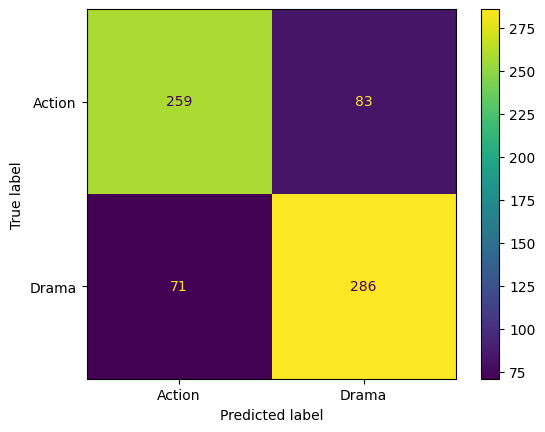

In [25]:
conf_disp = ConfusionMatrixDisplay(confusion_matrix = optimal_conf_mat, display_labels = knn_clf.classes_)
conf_disp.plot()

In [26]:
# To verify the confusion matrix and labels

pd.crosstab(test_y, y_pred, rownames = ['Actual'], colnames = ['Predicted'], margins = True)

Predicted,Action,Drama,All
Actual,,,
Action,259,83,342
Drama,71,286,357
All,330,369,699


**To compute Precision score**

In [27]:
# To compute precision for Action class

precision_action = precision_score(test_y, y_pred, pos_label = 'Action')
precision_action

0.7848484848484848

In [28]:
# To compute precision for Drama class

precision_drama = precision_score(test_y, y_pred, pos_label = 'Drama')
precision_drama

0.7750677506775068

In [29]:
precision_score(test_y, y_pred, average=None)

array([0.78484848, 0.77506775])

In [30]:
# To compute overall precision

overall_precison = precision_score(test_y, y_pred, average = 'weighted')
overall_precison

0.779853174263307

**To compute Recall score**

In [31]:
# To compute recall for Action class

recall_action = recall_score(test_y, y_pred, pos_label = 'Action')
recall_action

0.7573099415204678

In [32]:
# To compute recall for Drama class

recall_drama = recall_score(test_y, y_pred, pos_label = 'Drama')
recall_drama

0.8011204481792717

In [33]:
recall_score(test_y, y_pred, average = None)

array([0.75730994, 0.80112045])

In [34]:
# To compute overall recall

overall_recall = recall_score(test_y, y_pred, average = 'weighted')
overall_recall

0.7796852646638054

**To compute F-score score**

In [35]:
# To compute F-score for Action class

f1_score_action = f1_score(test_y, y_pred, pos_label = 'Action')
f1_score_action

0.7708333333333333

In [36]:
# To compute F-score for Drama class

f1_score_drama = f1_score(test_y, y_pred, pos_label = 'Drama')
f1_score_drama

0.787878787878788

In [37]:
f1_score(test_y, y_pred, average = None)

array([0.77083333, 0.78787879])

In [38]:
# To compute overall F-score

overall_f1_score = f1_score(test_y, y_pred, average = 'weighted')
overall_f1_score

0.7795389517492521

In [39]:
precision_vals = [precision_action, precision_drama, overall_precison]
recall_vals = [recall_action, recall_drama, overall_recall]
f1_vals = [f1_score_action, f1_score_drama, overall_f1_score]

In [40]:
index_labels = ['Action class', 'Drama class', 'Overall']
column_labels = ['Precision', 'Recall', 'F1-score']

pd.DataFrame({'Precison': precision_vals, 'Recall': recall_vals, 'F1-score': f1_vals}, index = index_labels)

,Precison,Recall,F1-score
Action class,0.784848,0.757310,0.770833
Drama class,0.775068,0.801120,0.787879
Overall,0.779853,0.779685,0.779539
